# Ejercicio 9.4

Calcular la reserva de una seguro temporal de vida-riesgo a prima periódica aplicando el principio de equilibrio, para una edad de 40, duración 20, capital 100.000 y base técnica: GKM95 al 3\%.

${}_{0}V_{x} = A_{x} - \pi \cdot \ddot{a}_{x} = 0$ 

$\pi = \cfrac{A{x}{n}}{ä{x}{n}}$


${}_{t}V_{x} = A{40+t}{10-t} - \pi \cdot ä{40+t}{10-t}$


In [13]:
from pyliferisk import *
from pyliferisk.mortalitytables import GKM95
import numpy as np

nt = Actuarial(nt=GKM95, i=0.03)
x, n, Cm = 40, 20, 100000

Premium = Cm * Axn(nt, x, n) / annuity(nt, x, n, 0)

def Reserve(t):
   return round(Cm * Axn(nt, x+t, n-t) - Premium * annuity(nt, x+t, n-t, 0),2)

reserve = np.zeros(n+1)
for t in range(n):
   reserve[t] = Reserve(t)

reserve

array([   0.  ,  253.34,  501.92,  743.94,  977.36, 1199.79, 1408.34,
       1599.67, 1769.94, 1914.83, 2029.44, 2108.34, 2145.56, 2134.42,
       2067.62, 1937.21, 1734.56, 1450.27, 1074.07,  594.76,    0.  ])

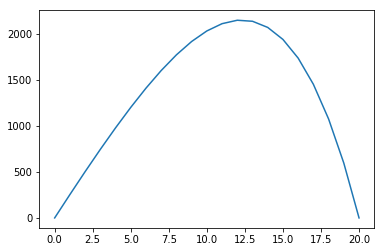

In [18]:
import matplotlib.pyplot as plt

x = list(range(n+1))
y = reserve
plt.plot(x, y)